In [15]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
#from sklearn.externals import joblib

# Import SMOTE to solve imbalance dataset
from imblearn.over_sampling import SMOTE

# For saving models
import pickle

# Normalization of the data
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

In [2]:
"""Attributes:

Dataset information:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
Several constraints were placed on the selection of these instances from a larger database. 
In particular, all patients here are females at least 21 years old of Pima Indian heritage.


Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

"""

'Attributes:\n\nDataset information:\n\nThis dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.\nSeveral constraints were placed on the selection of these instances from a larger database. \nIn particular, all patients here are females at least 21 years old of Pima Indian heritage.\n\n\nPregnancies: Number of times pregnant\n\nGlucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test\n\nBloodPressure: Diastolic blood pressure (mm Hg)\n\nSkinThickness: Triceps skin fold thickness (mm)\n\nInsulin: 2-Hour serum insulin (mu U/ml)\n\nBMI: Body mass index (weight in kg/(height in m)^2)\n\nDiabetesPedigreeFunction: Diabetes pedigree function\n\nAge: Age (years)\n\nOutcome: Class variable (0 or 1)\n\n'

In [3]:
diabetes = pd.read_csv('D:/yanne/Documents/hackathon/diabetes-pred/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
corr = diabetes.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

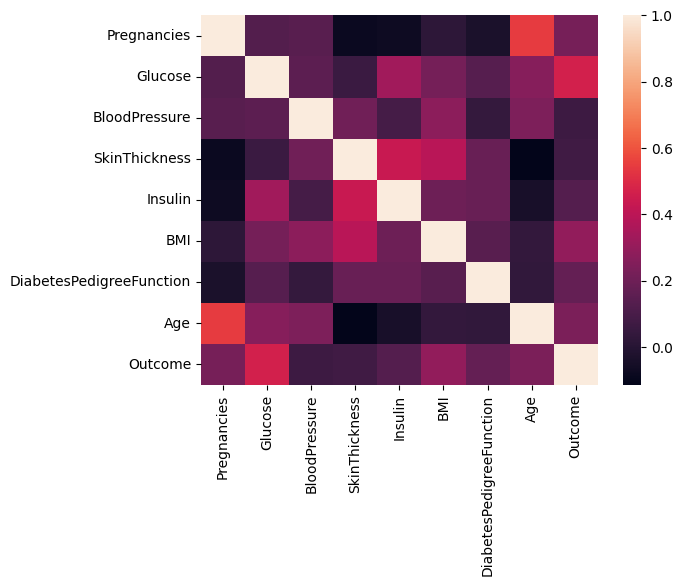

In [7]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [8]:
# Shuffle the dataset
df_shuffled = shuffle(diabetes)

# Reset the index
df_shuffled = df_shuffled.reset_index(drop=True)
df_shuffled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,164,84,21,0,30.8,0.831,32,1
1,10,115,0,0,0,35.3,0.134,29,0
2,10,129,76,28,122,35.9,0.280,39,0
3,3,84,72,32,0,37.2,0.267,28,0
4,4,92,80,0,0,42.2,0.237,29,0


In [9]:
# Select the features and target
X = df_shuffled.drop('Outcome',1)
y = df_shuffled['Outcome']

In [10]:
# Resampling the dataset
oversample = SMOTE()
transformed_features, transformed_label = oversample.fit_resample(X, y)

In [11]:
print(f'new label count: {transformed_label.value_counts()}')
print(f'old label count: {y.value_counts()}')

new label count: 1    500
0    500
Name: Outcome, dtype: int64
old label count: 0    500
1    268
Name: Outcome, dtype: int64


In [12]:
# Split the data into training set and testing set
trainData, testData, trainLabel, testLabel = train_test_split(transformed_features, transformed_label, test_size=0.2, random_state=42)

In [13]:
Sampledf = df_shuffled[750:]

In [16]:
# standardzing the train data
stds = StandardScaler()
scaler = stds.fit(trainData)
trainData = scaler.transform(trainData)
# standardzing the test data
testData = scaler.transform(testData)

In [17]:
# Normalize the data 
#means = np.mean(trainData, axis=0)
#stds = np.std(trainData, axis=0)

#trainData = (trainData - means)/stds
#testData = (testData - means)/stds


## Model 1: SVC Classifier

In [18]:
#Now , we will use the our training data to 
#create a bayesian classifier.

model1 = SVC()
model1.fit(trainData, trainLabel)

#After we train our bayesian classifier , 
#we test how well it works using our test data.
accuracy = model1.score(testData,testLabel)
print("accuracy = ",accuracy * 100,"%")

accuracy =  82.5 %


## Model 2: Logistic Regression Classifier

In [19]:
model2 = LogisticRegression()
model2.fit(trainData,trainLabel)
accuracy = model2.score(testData,testLabel)
print("accuracy = ",accuracy * 100,"%")

accuracy =  77.5 %


In [20]:
coeff = list(model2.coef_[0])
coeff

[0.3759389082026129,
 1.1156455595237524,
 -0.213917518144875,
 -0.013578485502329036,
 -0.14389222194998175,
 0.6885332908669428,
 0.2881514378967957,
 0.25742838470569684]

In [21]:
labels = list(df_shuffled.drop('Outcome',1).columns)
labels

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

Text(0.5, 0, 'Importance')

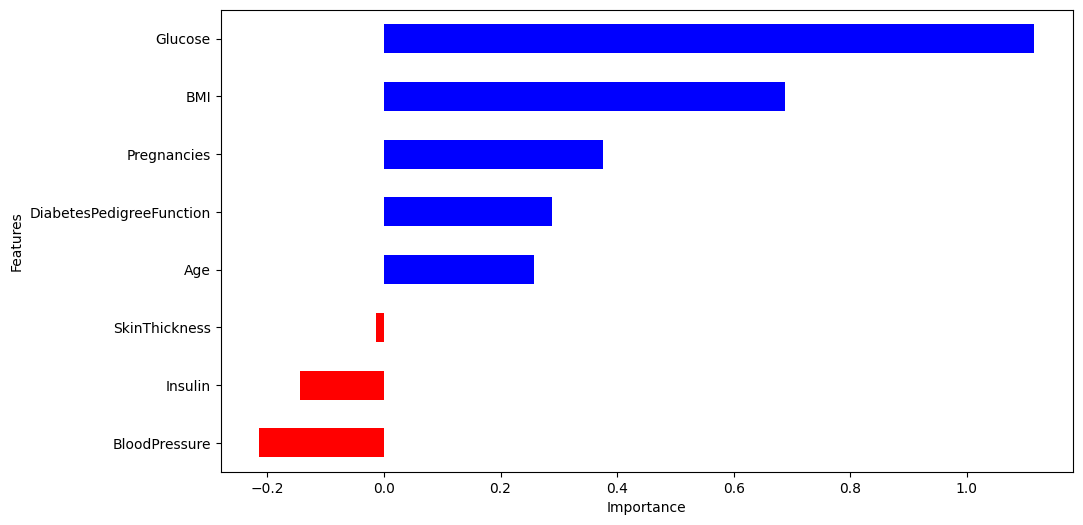

In [22]:
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

## Model 3: Decision Tree Classifier

In [23]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'AUC': auc,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1,
                        'Accuracy': accuracy,
                        },
                        ignore_index=True
                       )
  
    return table

In [24]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = round(roc_auc_score(y_test_data, preds), 3)
    accuracy = round(accuracy_score(y_test_data, preds), 3)
    precision = round(precision_score(y_test_data, preds), 3)
    recall = round(recall_score(y_test_data, preds), 3)
    f1 = round(f1_score(y_test_data, preds), 3)

    table = pd.DataFrame({'model': [model_name],
                        'AUC': [auc],
                        'precision': [precision], 
                        'recall': [recall],
                        'f1': [f1],
                        'accuracy': [accuracy]
                        })
  
    return table

In [25]:
# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}


In [26]:
# Instantiate model
model3 = DecisionTreeClassifier(random_state=0)

# Instantiate GridSearch
model3_cv = GridSearchCV(model3, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [27]:
%%time
model3_cv.fit(trainData, trainLabel)

CPU times: total: 1.69 s
Wall time: 1.77 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'precision', 'recall', 'f1', 'accuracy', 'roc_auc'})

In [28]:
# Check best parameters
model3_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [29]:
# Check best AUC score on CV
model3_cv.best_score_

0.7837635054021608

In [30]:
# Get decision tree model CV scores
model3_cv_results = make_results('Decision Tree CV', model3_cv, 'auc')
print(model3_cv_results)

              Model       AUC  Precision    Recall        F1  Accuracy
0  Decision Tree CV  0.783764   0.715477  0.776961  0.744454    0.7275


## Pickle the model

In [31]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [32]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [69]:
# Define a path to the folder where you want to save the model
path = 'D:/yanne/Documents/hackathon/diabetes-pred/'

### Saving ALL 3 Models

In [82]:
# saving StandardScaler
write_pickle(path, stds,'scaler.pkl')
scalermodel =  read_pickle(path, 'scaler.pkl')

In [70]:
#model saving and loading
# Write pickle
write_pickle(path, model1, 'diabetesModel1.pkl')
# Read pickle
diabetesLoadedModel1 = read_pickle(path, 'diabetesModel1.pkl')

#joblib.dump(diabetesCheck, 'diabeteseModel.pkl')
#diabetesLoadedModel = joblib.load('diabeteseModel.pkl')

In [71]:
#model saving and loading
# Write pickle
write_pickle(path, model2, 'diabetesModel2.pkl')
# Read pickle
diabetesLoadedModel2 = read_pickle(path, 'diabetesModel2.pkl')

#joblib.dump(diabetesCheck, 'diabeteseModel.pkl')
#diabetesLoadedModel = joblib.load('diabeteseModel.pkl')

In [72]:
#model saving and loading
# Write pickle
write_pickle(path, model3_cv, 'diabetesModel3.pkl')
# Read pickle
diabetesLoadedModel3 = read_pickle(path, 'diabetesModel3.pkl')

#joblib.dump(diabetesCheck, 'diabeteseModel.pkl')
#diabetesLoadedModel = joblib.load('diabeteseModel.pkl')

In [73]:
#testing loaded model to make prediction
accuracyModel = diabetesLoadedModel1.score(testData,testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  82.5 %


In [74]:
Sampledf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
750,3,116,0,0,0,23.5,0.187,23,0
751,3,100,68,23,81,31.6,0.949,28,0
752,11,85,74,0,0,30.1,0.300,35,0
753,1,93,56,11,0,22.5,0.417,22,0
754,2,105,80,45,191,33.7,0.711,29,1


In [75]:
sampleData = Sampledf[:1]
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures

array([[  3.   , 116.   ,   0.   ,   0.   ,   0.   ,  23.5  ,   0.187,
         23.   ]])

### First Model Predictions

In [76]:
prediction1 = diabetesLoadedModel1.predict(sampleDataFeatures)
#predictionProbab = diabetesLoadedModel1.predict_proba(sampleDataFeatures)

In [77]:
prediction1

array([0], dtype=int64)

### Second Model Predictions

In [78]:
prediction2 = diabetesLoadedModel2.predict(sampleDataFeatures)

In [79]:
prediction2

array([1], dtype=int64)

### Third Model Predictions

In [80]:
prediction3 = diabetesLoadedModel3.predict(sampleDataFeatures)

In [81]:
prediction3

array([1], dtype=int64)